<a href="https://colab.research.google.com/github/phu0n9/BigData_movie/blob/master/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# drive.mount('/content/drive')
# drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
import pandas as pd 
# pd.set_option("display.float_format", lambda x: "%.1f" % x)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import colors
import sklearn as sk
import datetime
import sys

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Merge AllMoviesClean & Imdb Data

In [ ]:
imdb_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IMDb movies.csv", delimiter=",")
imdb_df = imdb_df.rename(columns={'imdb_title_id':'imdb_id'})
imdb_df = imdb_df.drop(columns=['description','metascore','production_company','country','language','writer','director','actors','usa_gross_income','year'])
imdb_df['year'] = pd.DatetimeIndex(imdb_df['date_published']).year
imdb_df

,imdb_id,title,original_title,date_published,genre,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,year
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906-12-26,"Biography, Crime, Drama",70,6.1,537,$ 2250,NaN,7.0,7.0,1906
1,tt0001892,Den sorte drøm,Den sorte drøm,1911-08-19,Drama,53,5.9,171,NaN,NaN,4.0,2.0,1911
2,tt0002101,Cleopatra,Cleopatra,1912-11-13,"Drama, History",100,5.2,420,$ 45000,NaN,24.0,3.0,1912
3,tt0002130,L'Inferno,L'Inferno,1911-03-06,"Adventure, Drama, Fantasy",68,7.0,2019,NaN,NaN,28.0,14.0,1911
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1913,"Biography, Drama",60,5.7,438,NaN,NaN,12.0,5.0,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019-03-15,"Horror, Thriller",106,7.2,219,NaN,NaN,21.0,NaN,2019
81269,tt9905412,Ottam,Ottam,2019-03-08,Drama,120,7.8,510,INR 4000000,$ 4791,NaN,NaN,2019
81270,tt9905462,Pengalila,Pengalila,2019-03-08,Drama,111,8.4,604,INR 10000000,NaN,NaN,NaN,2019
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019-03-08,Drama,130,8.4,369,NaN,NaN,NaN,NaN,2019


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/movies_metadata.csv", delimiter=",",low_memory=False)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45

In [ ]:
# df['release_date'] = df['release_date'].replace('/','-',regex=True)
mask = (df['release_date'] >= '1960-01-01') & (df['release_date'] <= '2017-12-31')
df = df.loc[mask]
df = df[['imdb_id','popularity','overview']]
df

,imdb_id,popularity,overview
0,tt0114709,21.946943,"Led by Woody, Andy's toys live happily in his ..."
1,tt0113497,17.015539,When siblings Judy and Peter discover an encha...
2,tt0113228,11.7129,A family wedding reignites the ancient feud be...
3,tt0114885,3.859495,"Cheated on, mistreated and stepped on, the wom..."
4,tt0113041,8.387519,Just when George Banks has recovered from his ...
...,...,...,...
45459,tt0112613,0.661558,It's the year 3000 AD. The world's most danger...
45460,tt0102797,5.683753,"Yet another version of the classic epic, with ..."
45462,tt2028550,0.178241,An artist struggles to finish his work while a...
45463,tt0303758,0.903007,"When one of her hits goes wrong, a professiona..."


In [ ]:
new_df = pd.merge(imdb_df,df,how='inner',on='imdb_id')
new_df

,imdb_id,title,original_title,date_published,genre,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,year,popularity,overview
0,tt0035423,Kate & Leopold,Kate & Leopold,2002-04-05,"Comedy, Fantasy, Romance",118,6.4,75298,$ 48000000,$ 76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...
1,tt0052281,Il tempo si è fermato,Il tempo si è fermato,1963,Drama,83,7.4,301,NaN,NaN,4.0,3.0,1963,0.072409,Two middle-aged men work as caretakers on an i...
2,tt0052607,The Battle of the Sexes,The Battle of the Sexes,1960-08-22,Comedy,84,6.7,1058,GBP 133060,NaN,17.0,10.0,1960,0.586584,Angela Barrows is a man-eating business woman ...
3,tt0052646,The Brain That Wouldn't Die,The Brain That Wouldn't Die,1962-08-10,"Horror, Sci-Fi",82,4.4,5763,$ 62000,NaN,174.0,78.0,1962,2.131425,Dr. Bill Cortner (Jason Evers) and his fiancée...
4,tt0052680,Cash McCall,Cash McCall,1960-01-27,"Drama, Romance",102,6.4,1025,NaN,NaN,21.0,15.0,1960,0.362876,Cash McCall is a 1960 movie starring James Gar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29608,tt6712026,Kavan,Kavan,2017-03-31,"Action, Thriller",150,7.1,1678,NaN,$ 142784,12.0,8.0,2017,1.262638,"A budding journalist passionate about ethical,..."
29609,tt6721848,Kolonya Cumhuriyeti,Kolonya Cumhuriyeti,2017-04-21,Comedy,110,5.9,2754,NaN,$ 3540420,2.0,3.0,2017,0.173603,NaN
29610,tt6731636,Jaesim,Jaesim,2017-02-15,"Crime, Drama",119,6.7,813,NaN,$ 17198072,8.0,4.0,2017,1.956476,"A taxi driver is found dead, and Hyun-woo, the..."
29611,tt6772874,Xi huan ni,Xi huan ni,2017-04-28,"Comedy, Drama, Romance",106,6.7,1172,NaN,$ 30996615,8.0,10.0,2017,0.46796,"Lu Jin is a handsome, wealthy hotel executive ..."


In [ ]:
new_df = new_df.drop(new_df[(new_df['budget'].isnull()) | (new_df['worlwide_gross_income'].isnull())].index)

In [ ]:
new_df

,imdb_id,title,original_title,date_published,genre,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,year,popularity,overview
0,tt0035423,Kate & Leopold,Kate & Leopold,2002-04-05,"Comedy, Fantasy, Romance",118,6.4,75298,$ 48000000,$ 76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...
19,tt0053472,À bout de souffle,À bout de souffle,1960-03-16,"Crime, Drama",90,7.9,66407,FRF 400000,$ 378503,196.0,192.0,1960,8.200586,A young car thief kills a policeman and tries ...
31,tt0053604,The Apartment,The Apartment,1960-09-16,"Comedy, Drama, Romance",125,8.3,148964,$ 3000000,$ 177066,308.0,229.0,1960,11.994281,Bud Baxter is a minor clerk in a huge New York...
116,tt0054098,Mughal-E-Azam,Mughal-E-Azam,1960-08-05,"Drama, Romance, War",197,8.3,6484,INR 15000000,$ 161434,27.0,13.0,1960,0.283219,"Set in the 16th century AD, the movie brings t..."
130,tt0054167,Peeping Tom,Peeping Tom,1960-05-16,"Drama, Horror, Thriller",101,7.7,27880,GBP 135000,$ 24640,159.0,113.0,1960,7.229587,Loner Mark Lewis works at a film studio during...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29595,tt6389344,Tri bogatyrya i Morskoy tsar,Tri bogatyrya i Morskoy tsar,2017-01-01,"Animation, Action, Adventure",75,4.7,279,$ 4000000,$ 13816357,NaN,1.0,2017,0.468664,No plot overview available
29599,tt6569546,Vurdalaki,Vurdalaki,2017-02-22,"Action, Fantasy, Horror",90,4.2,460,RUR 162000000,$ 782438,1.0,4.0,2017,9.334447,The story takes place in 18th century russia. ...
29602,tt6574272,Phoenix Forgotten,Phoenix Forgotten,2017-04-21,"Horror, Mystery, Sci-Fi",87,5.2,4976,$ 2800000,$ 3697729,68.0,66.0,2017,12.560942,20 years after three teenagers disappeared in ...
29603,tt6597454,Selfie,Selfie,2017-06-23,Comedy,85,6.1,487,EUR 10000,$ 184395,NaN,9.0,2017,0.313827,NaN


# Plot graphs

In [ ]:
movie_count = new_df['year'].value_counts()

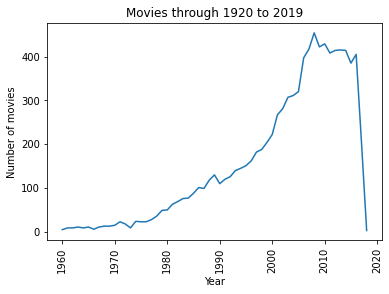

In [ ]:
sns.lineplot(x=movie_count.index,y=movie_count)
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.title("Movies through 1920 to 2019")
plt.xticks(rotation='vertical')
plt.show()

# Drop movies before 1960s and after 2017

`Second Golden Age of Holywood`

In [ ]:
new_df = new_df.drop(new_df[(new_df['year'] < 1960) & (new_df['year'] > 2017)].index)
new_df.reset_index(drop=True,inplace=True)

In [ ]:
new_df['popularity'] = new_df['popularity'].replace(',',".",regex=True).astype(float)

In [ ]:
new_df

,imdb_id,title,original_title,date_published,genre,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,year,popularity,overview
0,tt0035423,Kate & Leopold,Kate & Leopold,2002-04-05,"Comedy, Fantasy, Romance",118,6.4,75298,$ 48000000,$ 76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...
1,tt0053472,À bout de souffle,À bout de souffle,1960-03-16,"Crime, Drama",90,7.9,66407,FRF 400000,$ 378503,196.0,192.0,1960,8.200586,A young car thief kills a policeman and tries ...
2,tt0053604,The Apartment,The Apartment,1960-09-16,"Comedy, Drama, Romance",125,8.3,148964,$ 3000000,$ 177066,308.0,229.0,1960,11.994281,Bud Baxter is a minor clerk in a huge New York...
3,tt0054098,Mughal-E-Azam,Mughal-E-Azam,1960-08-05,"Drama, Romance, War",197,8.3,6484,INR 15000000,$ 161434,27.0,13.0,1960,0.283219,"Set in the 16th century AD, the movie brings t..."
4,tt0054167,Peeping Tom,Peeping Tom,1960-05-16,"Drama, Horror, Thriller",101,7.7,27880,GBP 135000,$ 24640,159.0,113.0,1960,7.229587,Loner Mark Lewis works at a film studio during...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,tt6389344,Tri bogatyrya i Morskoy tsar,Tri bogatyrya i Morskoy tsar,2017-01-01,"Animation, Action, Adventure",75,4.7,279,$ 4000000,$ 13816357,NaN,1.0,2017,0.468664,No plot overview available
9218,tt6569546,Vurdalaki,Vurdalaki,2017-02-22,"Action, Fantasy, Horror",90,4.2,460,RUR 162000000,$ 782438,1.0,4.0,2017,9.334447,The story takes place in 18th century russia. ...
9219,tt6574272,Phoenix Forgotten,Phoenix Forgotten,2017-04-21,"Horror, Mystery, Sci-Fi",87,5.2,4976,$ 2800000,$ 3697729,68.0,66.0,2017,12.560942,20 years after three teenagers disappeared in ...
9220,tt6597454,Selfie,Selfie,2017-06-23,Comedy,85,6.1,487,EUR 10000,$ 184395,NaN,9.0,2017,0.313827,NaN


# Calculating revenue

In [ ]:
new_df['worlwide_gross_income'] = new_df['worlwide_gross_income'].str.replace('$ ','',regex=False)
new_df['worlwide_gross_income'] = new_df['worlwide_gross_income'].apply(pd.to_numeric)
new_df['worlwide_gross_income'] = new_df['worlwide_gross_income'].astype(np.int64)
new_df = new_df.rename(columns={'worlwide_gross_income':'revenue'})

# Actor, actress, director, writer and Genre

In [ ]:
imdb_cast = pd.read_csv("/content/drive/My Drive/Colab Notebooks/cast.csv", delimiter=",",low_memory=False)
imdb_cast

,imdb_id,imdb_name_id,category,primaryName
0,tt0000001,nm0005690,director,William K.L. Dickson
1,tt0000005,nm0005690,director,William K.L. Dickson
2,tt0000006,nm0005690,director,William K.L. Dickson
3,tt0000007,nm0005690,director,William K.L. Dickson
4,tt0000008,nm0005690,director,William K.L. Dickson
...,...,...,...,...
18994474,tt9916764,nm10538641,actor,Yvonne Akins
18994475,tt9916856,nm10538650,actress,Anna Fitoussi
18994476,tt9916856,nm10538646,actor,Andreas Demmel
18994477,tt9916856,nm10538647,actress,Kathrin Knöpfle


In [ ]:
cast = pd.merge(imdb_cast,new_df,on='imdb_id',how='inner').loc[:,('imdb_id','imdb_name_id','category','primaryName','popularity')]
# cast = cast.rename(columns={'avg_vote':'popularity'})
cast

,imdb_id,imdb_name_id,category,primaryName,popularity
0,tt0056085,nm0000406,director,John Ford,7.281721
1,tt0056085,nm0550892,director,George Marshall,7.281721
2,tt0056085,nm0861703,director,Richard Thorpe,7.281721
3,tt0056085,nm0368871,director,Henry Hathaway,7.281721
4,tt0056085,nm0000078,actor,John Wayne,7.281721
...,...,...,...,...,...
46412,tt3261302,nm6085533,actor,Darius Williams,4.668314
46413,tt3261302,nm6049515,actress,Kate Rasmussen,4.668314
46414,tt3261302,nm7655698,actor,Albert Allu,4.668314
46415,tt3261302,nm7655714,actress,Helen Audsley,4.668314


#### actor

In [ ]:
actor = cast[cast['category'] == 'actor'].loc[:,('imdb_name_id','imdb_id','popularity')].groupby('imdb_name_id').agg({'popularity':np.mean,'imdb_id':np.size}).reset_index().rename(columns={'popularity':'actor_pop','imdb_id':'actors_in_movie'})
actor = pd.merge(cast.loc[:,('imdb_id','imdb_name_id')],actor,how='inner',on='imdb_name_id').rename(columns={'imdb_name_id':'actor_id'})
actor

,imdb_id,actor_id,actor_pop,actors_in_movie
0,tt0056085,nm0000078,7.281721,1
1,tt0056085,nm0000020,8.916060,3
2,tt0062755,nm0000020,8.916060,3
3,tt0064116,nm0000020,8.916060,3
4,tt0056085,nm0000071,7.281721,1
...,...,...,...,...
24518,tt5777418,nm8176825,0.122363,1
24519,tt5777418,nm8189508,0.122363,1
24520,tt5777418,nm0349609,0.122363,1
24521,tt3261302,nm6085533,4.668314,1


In [ ]:
actor_pop = actor.groupby('imdb_id',as_index=False).agg({'actor_pop':sum,'actor_id':np.size}).rename(columns={'actor_id':'actor_movie_count'})
actor_pop['actor_movie_pop'] = actor_pop['actor_pop'] / actor_pop['actor_movie_count']
actor_pop = actor_pop.drop(['actor_pop'],axis=1)
actor_pop

,imdb_id,actor_movie_count,actor_movie_pop
0,tt0035423,3,8.779866
1,tt0053472,3,5.975909
2,tt0053604,3,8.750395
3,tt0054098,2,0.283219
4,tt0054167,1,2.841957
...,...,...,...
9068,tt6389344,4,2.559049
9069,tt6569546,1,9.334447
9070,tt6574272,2,12.560942
9071,tt6597454,2,0.313827


#### actress

In [ ]:
actress = cast[cast['category'] == 'actress'].loc[:,('imdb_name_id','imdb_id','popularity')].groupby('imdb_name_id').agg({'popularity':np.mean,'imdb_id':np.size}).reset_index().rename(columns={'popularity':'actress_pop','imdb_id':'actresses_in_movie'})
actress = pd.merge(cast.loc[:,('imdb_id','imdb_name_id')],actress,how='inner',on='imdb_name_id').rename(columns={'imdb_name_id':'actress_id'})
actress

,imdb_id,actress_id,actress_pop,actresses_in_movie
0,tt0057940,nm0004647,3.425408,2
1,tt0093277,nm0004647,3.425408,2
2,tt0061452,nm0000266,16.616062,2
3,tt0055928,nm0000266,16.616062,2
4,tt0063415,nm0141255,5.354787,1
...,...,...,...,...
13169,tt1828148,nm4289918,0.242023,1
13170,tt2085002,nm4723934,0.962442,1
13171,tt5777418,nm8189535,0.122363,1
13172,tt3261302,nm6049515,4.668314,1


In [ ]:
actress_pop = actress.groupby('imdb_id',as_index=False).agg({'actress_pop':sum,'actress_id':np.size}).rename(columns={'actress_id':'actress_movie_count'})
actress_pop['actress_movie_pop'] = actress_pop['actress_pop'] / actress_pop['actress_movie_count']
actress_pop = actress_pop.drop(['actress_pop'],axis=1)
actress_pop

,imdb_id,actress_movie_count,actress_movie_pop
0,tt0035423,1,7.776708
1,tt0053472,1,8.907492
2,tt0053604,1,6.817179
3,tt0054098,2,0.283219
4,tt0054167,3,6.910720
...,...,...,...
8028,tt6265828,2,18.383806
8029,tt6569546,3,7.919960
8030,tt6574272,2,12.560942
8031,tt6597454,2,0.313827


#### director

In [ ]:
director = cast[cast['category'] == 'director'].loc[:,('imdb_name_id','imdb_id','popularity')].groupby('imdb_name_id').agg({'popularity':np.mean,'imdb_id':np.size}).reset_index().rename(columns={'popularity':'director_pop','imdb_id':'director_in_movie'})
director = pd.merge(cast.loc[:,('imdb_id','imdb_name_id')],director,how='inner',on='imdb_name_id').rename(columns={'imdb_name_id':'director_id'})
director

,imdb_id,director_id,director_pop,director_in_movie
0,tt0056085,nm0000406,5.765302,2
1,tt0057940,nm0000406,5.765302,2
2,tt0056085,nm0550892,7.281721,1
3,tt0056085,nm0861703,7.281721,1
4,tt0056085,nm0368871,7.577369,2
...,...,...,...,...
10995,tt1828148,nm0023753,0.242023,1
10996,tt1828148,nm0003984,0.242023,1
10997,tt2085002,nm3307527,0.962442,1
10998,tt5777418,nm4926025,0.122363,1


In [ ]:
director_pop = director.groupby('imdb_id',as_index=False).agg({'director_pop':sum,'director_id':np.size}).rename(columns={'director_id':'director_movie_count'})
director_pop['director_movie_pop'] = director_pop['director_pop'] / director_pop['director_movie_count']
director_pop = director_pop.drop(['director_pop'],axis=1)
director_pop

,imdb_id,director_movie_count,director_movie_pop
0,tt0035423,2,11.836761
1,tt0053472,1,5.170497
2,tt0053604,1,5.980728
3,tt0054098,1,0.283219
4,tt0054167,1,7.229587
...,...,...,...
9041,tt6389344,1,0.468888
9042,tt6569546,1,5.254280
9043,tt6574272,1,12.560942
9044,tt6597454,1,0.313827


### combo cast

In [ ]:
combo_cast = pd.merge(actor_pop,actress_pop,how='outer',on='imdb_id').merge(director_pop,how='outer',on='imdb_id')
combo_cast = combo_cast.fillna(0)
combo_cast['crew_count'] = (combo_cast['actor_movie_count']+combo_cast['actress_movie_count']+combo_cast['director_movie_count'])
combo_cast['crew_pop'] = (combo_cast['actor_movie_pop']+ combo_cast['actress_movie_pop']+ combo_cast['director_movie_pop']) / combo_cast['crew_count']
combo_cast

,imdb_id,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop
0,tt0035423,3.0,8.779866,1.0,7.776708,2.0,11.836761,6.0,4.732223
1,tt0053472,3.0,5.975909,1.0,8.907492,1.0,5.170497,5.0,4.010780
2,tt0053604,3.0,8.750395,1.0,6.817179,1.0,5.980728,5.0,4.309660
3,tt0054098,2.0,0.283219,2.0,0.283219,1.0,0.283219,5.0,0.169931
4,tt0054167,1.0,2.841957,3.0,6.910720,1.0,7.229587,5.0,3.396453
...,...,...,...,...,...,...,...,...,...
9205,tt0120910,0.0,0.000000,0.0,0.000000,6.0,11.884743,6.0,1.980790
9206,tt0374639,0.0,0.000000,0.0,0.000000,1.0,2.059458,1.0,2.059458
9207,tt0443057,0.0,0.000000,0.0,0.000000,1.0,0.431752,1.0,0.431752
9208,tt1013607,0.0,0.000000,0.0,0.000000,1.0,0.775708,1.0,0.775708


### genre

In [ ]:
genre = new_df['genre'].astype(str).str.split(',', expand = True).replace(regex=[r' ',r'\n'], value='')
genre

,0,1,2
0,Comedy,Fantasy,Romance
1,Crime,Drama,None
2,Comedy,Drama,Romance
3,Drama,Romance,War
4,Drama,Horror,Thriller
...,...,...,...
9217,Animation,Action,Adventure
9218,Action,Fantasy,Horror
9219,Horror,Mystery,Sci-Fi
9220,Comedy,None,None


In [ ]:
genre_arr = pd.unique(genre.values.ravel('K'))
genre_arr = genre_arr[genre_arr != np.array(None)]
genre_arr

array(['Comedy', 'Crime', 'Drama', 'War', 'Horror', 'Adventure',
       'Animation', 'Action', 'Biography', 'Western', 'Family',
       'Thriller', 'Mystery', 'Musical', 'Fantasy', 'Sci-Fi', 'Romance',
       'Documentary', 'History', 'Sport', 'Music'], dtype=object)

In [ ]:
genre = new_df[['genre', 'imdb_id']].replace(regex=r' ', value='')
genre['genre_list'] = new_df['genre'].astype(str).replace(regex=[r' ',r'\n'], value='')
genre['genre_count'] = genre['genre_list'].str.split(',').str.len()
for g in genre_arr:
    genre[f'{g}'] = np.where(genre['genre'].str.contains(g), 1, 0)
genre.drop('genre', axis=1, inplace=True)

In [ ]:
genre

,imdb_id,genre_list,genre_count,Comedy,Crime,Drama,War,Horror,Adventure,Animation,Action,Biography,Western,Family,Thriller,Mystery,Musical,Fantasy,Sci-Fi,Romance,Documentary,History,Sport,Music
0,tt0035423,"Comedy,Fantasy,Romance",3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,tt0053472,"Crime,Drama",2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0053604,"Comedy,Drama,Romance",3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,tt0054098,"Drama,Romance,War",3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,tt0054167,"Drama,Horror,Thriller",3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,tt6389344,"Animation,Action,Adventure",3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9218,tt6569546,"Action,Fantasy,Horror",3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9219,tt6574272,"Horror,Mystery,Sci-Fi",3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9220,tt6597454,Comedy,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create genre_point dataframe to calulate point based on popularity
genre_point_df = pd.DataFrame(genre_arr, columns=['genre'])

In [ ]:
# genre = data['genre'].astype(str).str.split(',', expand = True)
# genre.columns = ['genre{}'.format(i) for i in genre.columns]
# genre = genre.reset_index(drop=True)
# genre['imdb_id'] = data['imdb_id']
# genre = genre.replace(np.nan,0,regex=True)
# genre

In [ ]:
new_df = new_df.drop(columns=['genre'])
cast_genre = pd.merge(combo_cast,genre,on='imdb_id',how='inner')
final_df = pd.merge(new_df,cast_genre,on='imdb_id',how='inner')
final_df

,imdb_id,title,original_title,date_published,duration,avg_vote,votes,budget,revenue,reviews_from_users,reviews_from_critics,year,popularity,overview,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop,genre_list,genre_count,Comedy,Crime,Drama,War,Horror,Adventure,Animation,Action,Biography,Western,Family,Thriller,Mystery,Musical,Fantasy,Sci-Fi,Romance,Documentary,History,Sport,Music
0,tt0035423,Kate & Leopold,Kate & Leopold,2002-04-05,118,6.4,75298,$ 48000000,76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...,3.0,8.779866,1.0,7.776708,2.0,11.836761,6.0,4.732223,"Comedy,Fantasy,Romance",3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,tt0053472,À bout de souffle,À bout de souffle,1960-03-16,90,7.9,66407,FRF 400000,378503,196.0,192.0,1960,8.200586,A young car thief kills a policeman and tries ...,3.0,5.975909,1.0,8.907492,1.0,5.170497,5.0,4.010780,"Crime,Drama",2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0053604,The Apartment,The Apartment,1960-09-16,125,8.3,148964,$ 3000000,177066,308.0,229.0,1960,11.994281,Bud Baxter is a minor clerk in a huge New York...,3.0,8.750395,1.0,6.817179,1.0,5.980728,5.0,4.309660,"Comedy,Drama,Romance",3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,tt0054098,Mughal-E-Azam,Mughal-E-Azam,1960-08-05,197,8.3,6484,INR 15000000,161434,27.0,13.0,1960,0.283219,"Set in the 16th century AD, the movie brings t...",2.0,0.283219,2.0,0.283219,1.0,0.283219,5.0,0.169931,"Drama,Romance,War",3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,tt0054167,Peeping Tom,Peeping Tom,1960-05-16,101,7.7,27880,GBP 135000,24640,159.0,113.0,1960,7.229587,Loner Mark Lewis works at a film studio during...,1.0,2.841957,3.0,6.910720,1.0,7.229587,5.0,3.396453,"Drama,Horror,Thriller",3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,tt6389344,Tri bogatyrya i Morskoy tsar,Tri bogatyrya i Morskoy tsar,2017-01-01,75,4.7,279,$ 4000000,13816357,NaN,1.0,2017,0.468664,No plot overview available,4.0,2.559049,0.0,0.000000,1.0,0.468888,5.0,0.605587,"Animation,Action,Adventure",3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9244,tt6569546,Vurdalaki,Vurdalaki,2017-02-22,90,4.2,460,RUR 162000000,782438,1.0,4.0,2017,9.334447,The story takes place in 18th century russia. ...,1.0,9.334447,3.0,7.919960,1.0,5.254280,5.0,4.501737,"Action,Fantasy,Horror",3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9245,tt6574272,Phoenix Forgotten,Phoenix Forgotten,2017-04-21,87,5.2,4976,$ 2800000,3697729,68.0,66.0,2017,12.560942,20 years after three teenagers disappeared in ...,2.0,12.560942,2.0,12.560942,1.0,12.560942,5.0,7.536565,"Horror,Mystery,Sci-Fi",3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9246,tt6597454,Selfie,Selfie,2017-06-23,85,6.1,487,EUR 10000,184395,NaN,9.0,2017,0.313827,NaN,2.0,0.313827,2.0,0.313827,1.0,0.313827,5.0,0.188296,Comedy,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df['Month'] = pd.DatetimeIndex(final_df['date_published']).month
final_df['Day'] = pd.DatetimeIndex(final_df['date_published']).day
final_df

,imdb_id,title,original_title,date_published,duration,avg_vote,votes,budget,revenue,reviews_from_users,reviews_from_critics,year,popularity,overview,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop,genre_list,genre_count,Comedy,Crime,Drama,War,Horror,Adventure,Animation,Action,Biography,Western,Family,Thriller,Mystery,Musical,Fantasy,Sci-Fi,Romance,Documentary,History,Sport,Music,Month,Day
0,tt0035423,Kate & Leopold,Kate & Leopold,2002-04-05,118,6.4,75298,$ 48000000,76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...,3.0,8.779866,1.0,7.776708,2.0,11.836761,6.0,4.732223,"Comedy,Fantasy,Romance",3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4,5
1,tt0053472,À bout de souffle,À bout de souffle,1960-03-16,90,7.9,66407,FRF 400000,378503,196.0,192.0,1960,8.200586,A young car thief kills a policeman and tries ...,3.0,5.975909,1.0,8.907492,1.0,5.170497,5.0,4.010780,"Crime,Drama",2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,16
2,tt0053604,The Apartment,The Apartment,1960-09-16,125,8.3,148964,$ 3000000,177066,308.0,229.0,1960,11.994281,Bud Baxter is a minor clerk in a huge New York...,3.0,8.750395,1.0,6.817179,1.0,5.980728,5.0,4.309660,"Comedy,Drama,Romance",3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9,16
3,tt0054098,Mughal-E-Azam,Mughal-E-Azam,1960-08-05,197,8.3,6484,INR 15000000,161434,27.0,13.0,1960,0.283219,"Set in the 16th century AD, the movie brings t...",2.0,0.283219,2.0,0.283219,1.0,0.283219,5.0,0.169931,"Drama,Romance,War",3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,5
4,tt0054167,Peeping Tom,Peeping Tom,1960-05-16,101,7.7,27880,GBP 135000,24640,159.0,113.0,1960,7.229587,Loner Mark Lewis works at a film studio during...,1.0,2.841957,3.0,6.910720,1.0,7.229587,5.0,3.396453,"Drama,Horror,Thriller",3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,tt6389344,Tri bogatyrya i Morskoy tsar,Tri bogatyrya i Morskoy tsar,2017-01-01,75,4.7,279,$ 4000000,13816357,NaN,1.0,2017,0.468664,No plot overview available,4.0,2.559049,0.0,0.000000,1.0,0.468888,5.0,0.605587,"Animation,Action,Adventure",3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9244,tt6569546,Vurdalaki,Vurdalaki,2017-02-22,90,4.2,460,RUR 162000000,782438,1.0,4.0,2017,9.334447,The story takes place in 18th century russia. ...,1.0,9.334447,3.0,7.919960,1.0,5.254280,5.0,4.501737,"Action,Fantasy,Horror",3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,22
9245,tt6574272,Phoenix Forgotten,Phoenix Forgotten,2017-04-21,87,5.2,4976,$ 2800000,3697729,68.0,66.0,2017,12.560942,20 years after three teenagers disappeared in ...,2.0,12.560942,2.0,12.560942,1.0,12.560942,5.0,7.536565,"Horror,Mystery,Sci-Fi",3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4,21
9246,tt6597454,Selfie,Selfie,2017-06-23,85,6.1,487,EUR 10000,184395,NaN,9.0,2017,0.313827,NaN,2.0,0.313827,2.0,0.313827,1.0,0.313827,5.0,0.188296,Comedy,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,23


# Converting currency

In [ ]:
budget_df = final_df.loc[:, ('imdb_id', 'budget','year')]
budget_df['currency_amount'] = budget_df['budget'].str.extract(' (\d+)')
budget_df['currency_code'] = budget_df['budget'].str.replace(' \d+', '')
budget_df = budget_df.drop(columns='budget')
budget_df = budget_df.rename(columns={'year':'TIME'})
budget_df

,imdb_id,TIME,currency_amount,currency_code
0,tt0035423,2002,48000000,$
1,tt0053472,1960,400000,FRF
2,tt0053604,1960,3000000,$
3,tt0054098,1960,15000000,INR
4,tt0054167,1960,135000,GBP
...,...,...,...,...
9243,tt6389344,2017,4000000,$
9244,tt6569546,2017,162000000,RUR
9245,tt6574272,2017,2800000,$
9246,tt6597454,2017,10000,EUR


In [ ]:
currency = pd.read_csv("/content/drive/My Drive/Colab Notebooks/currency.csv", delimiter=",")
currency = currency.drop(currency[currency['TIME'] < 1960].index)
currency = currency.loc[:,('LOCATION','TIME','Value')]
currency.reset_index(drop=True, inplace=True)
currency

,LOCATION,TIME,Value
0,AUS,1960,0.892857
1,AUS,1961,0.892857
2,AUS,1962,0.892857
3,AUS,1963,0.892857
4,AUS,1964,0.892857
...,...,...,...
3087,HKG,2013,7.756000
3088,HKG,2014,7.754083
3089,HKG,2015,7.751750
3090,HKG,2016,7.762250


In [ ]:
country_code = pd.read_csv("/content/drive/My Drive/Colab Notebooks/country_codes.csv", delimiter=",")
country_code = country_code.loc[:, ('ISO3166-1-Alpha-3', 'ISO4217-currency_alphabetic_code')]
country_code = country_code.rename(columns={'ISO3166-1-Alpha-3':'LOCATION','ISO4217-currency_alphabetic_code':'currency_code'})
country_code['currency_code'] = country_code['currency_code'].str.replace('USD','$')
country_code

,LOCATION,currency_code
0,TWN,NaN
1,AFG,AFN
2,ALB,ALL
3,DZA,DZD
4,ASM,$
...,...,...
245,ESH,MAD
246,YEM,YER
247,ZMB,ZMW
248,ZWE,ZWL


In [ ]:
currency_df = pd.merge(currency,country_code,on='LOCATION',how='inner')
currency_df

,LOCATION,TIME,Value,currency_code
0,AUS,1960,0.892857,AUD
1,AUS,1961,0.892857,AUD
2,AUS,1962,0.892857,AUD
3,AUS,1963,0.892857,AUD
4,AUS,1964,0.892857,AUD
...,...,...,...,...
3005,HKG,2013,7.756000,HKD
3006,HKG,2014,7.754083,HKD
3007,HKG,2015,7.751750,HKD
3008,HKG,2016,7.762250,HKD


In [ ]:
euro = currency_df[currency_df['currency_code']=='EUR']
euro = euro.groupby('TIME')['Value'].agg([np.mean,np.median,lambda x: x.mad(),lambda y: stats.median_absolute_deviation(y),np.std])
euro['TIME'] = euro.index
euro = euro.rename(columns={'<lambda_0>':'Mean Absolute Deviation','<lambda_1>':'Median Absolute Deviation','std':'Standard Deviation'})
euro.reset_index(drop=True, inplace=True)
euro

,mean,median,Mean Absolute Deviation,Median Absolute Deviation,Standard Deviation,TIME
0,0.881500,0.681432,5.475316e-01,0.665094,0.664337,1960
1,0.870589,0.681432,5.334280e-01,0.664705,0.645495,1961
2,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1962
3,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1963
4,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1964
5,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1965
6,0.868399,0.681432,5.306126e-01,0.664705,0.641814,1966
7,0.873998,0.685670,5.266130e-01,0.670988,0.639008,1967
8,0.907272,0.732284,5.118892e-01,0.679536,0.626565,1968
9,0.908002,0.751884,5.071240e-01,0.679536,0.621901,1969


In [ ]:
euro = euro.loc[:,('median','TIME')]
euro = euro.rename(columns={'median':'Value'})
euro['currency_code'] = 'EUR'
euro

,Value,TIME,currency_code
0,0.681432,1960,EUR
1,0.681432,1961,EUR
2,0.681432,1962,EUR
3,0.681432,1963,EUR
4,0.681432,1964,EUR
5,0.681432,1965,EUR
6,0.681432,1966,EUR
7,0.685670,1967,EUR
8,0.732284,1968,EUR
9,0.751884,1969,EUR


In [ ]:
currency_df = currency_df.drop(currency_df[currency_df['currency_code']=='EUR'].index)
currency_df = currency_df.drop(columns='LOCATION')
currency_df = currency_df.append(euro)
currency_df

,TIME,Value,currency_code
0,1960,0.892857,AUD
1,1961,0.892857,AUD
2,1962,0.892857,AUD
3,1963,0.892857,AUD
4,1964,0.892857,AUD
...,...,...,...
53,2013,0.752945,EUR
54,2014,0.752728,EUR
55,2015,0.901296,EUR
56,2016,0.903421,EUR


In [ ]:
budget_df = pd.merge(currency_df,budget_df,left_on=['currency_code','TIME'],right_on=['currency_code','TIME'],how='inner')

In [ ]:
budget_df['currency_amount'] = budget_df['currency_amount'].astype(float)
budget_df['budget'] = budget_df['Value']* budget_df['currency_amount']
budget_df

,TIME,Value,currency_code,imdb_id,currency_amount,budget
0,1971,0.882670,AUD,tt0067541,800000.0,706136.00
1,1977,0.901825,AUD,tt0073540,440000.0,396803.00
2,1977,0.901825,AUD,tt0076299,810000.0,730478.25
3,1982,0.985863,AUD,tt0082432,2600000.0,2563243.80
4,1984,1.139519,AUD,tt0087981,5500000.0,6267354.50
...,...,...,...,...,...,...
9085,2017,0.885206,EUR,tt5897636,960000.0,849797.76
9086,2017,0.885206,EUR,tt6125690,2000000.0,1770412.00
9087,2017,0.885206,EUR,tt6194530,2800000.0,2478576.80
9088,2017,0.885206,EUR,tt6194850,350000.0,309822.10


In [ ]:
budget_df = budget_df.loc[:,('imdb_id','budget')]

In [ ]:
final_df = final_df.drop(columns='budget')
final_df = pd.merge(final_df,budget_df,on='imdb_id',how='inner')

In [ ]:
final_df

,imdb_id,title,original_title,date_published,duration,avg_vote,votes,revenue,reviews_from_users,reviews_from_critics,year,popularity,overview,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop,genre_list,genre_count,Comedy,Crime,Drama,War,Horror,Adventure,Animation,Action,Biography,Western,Family,Thriller,Mystery,Musical,Fantasy,Sci-Fi,Romance,Documentary,History,Sport,Music,Month,Day,budget
0,tt0035423,Kate & Leopold,Kate & Leopold,2002-04-05,118,6.4,75298,76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...,3.0,8.779866,1.0,7.776708,2.0,11.836761,6.0,4.732223,"Comedy,Fantasy,Romance",3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4,5,4.800000e+07
1,tt0053604,The Apartment,The Apartment,1960-09-16,125,8.3,148964,177066,308.0,229.0,1960,11.994281,Bud Baxter is a minor clerk in a huge New York...,3.0,8.750395,1.0,6.817179,1.0,5.980728,5.0,4.309660,"Comedy,Drama,Romance",3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9,16,3.000000e+06
2,tt0054098,Mughal-E-Azam,Mughal-E-Azam,1960-08-05,197,8.3,6484,161434,27.0,13.0,1960,0.283219,"Set in the 16th century AD, the movie brings t...",2.0,0.283219,2.0,0.283219,1.0,0.283219,5.0,0.169931,"Drama,Romance,War",3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,5,7.142850e+07
3,tt0054167,Peeping Tom,Peeping Tom,1960-05-16,101,7.7,27880,24640,159.0,113.0,1960,7.229587,Loner Mark Lewis works at a film studio during...,1.0,2.841957,3.0,6.910720,1.0,7.229587,5.0,3.396453,"Drama,Horror,Thriller",3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,16,4.821431e+04
4,tt0054177,Le petit soldat,Le petit soldat,1963-01-25,88,7.3,5405,24296,25.0,33.0,1963,2.394441,During the Algerian war for independence from ...,3.0,3.362132,1.0,4.749160,1.0,5.170497,5.0,2.656358,"War,Drama",2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,1.800000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,tt6265828,A Ghost Story,A Ghost Story,2017-08-11,92,6.8,49515,1951683,478.0,308.0,2017,24.339781,"Recently deceased, a white-sheeted ghost retur...",2.0,16.129907,2.0,18.383806,1.0,18.264861,5.0,10.555715,"Drama,Fantasy,Romance",3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,8,11,1.000000e+05
9278,tt6389344,Tri bogatyrya i Morskoy tsar,Tri bogatyrya i Morskoy tsar,2017-01-01,75,4.7,279,13816357,NaN,1.0,2017,0.468664,No plot overview available,4.0,2.559049,0.0,0.000000,1.0,0.468888,5.0,0.605587,"Animation,Action,Adventure",3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4.000000e+06
9279,tt6574272,Phoenix Forgotten,Phoenix Forgotten,2017-04-21,87,5.2,4976,3697729,68.0,66.0,2017,12.560942,20 years after three teenagers disappeared in ...,2.0,12.560942,2.0,12.560942,1.0,12.560942,5.0,7.536565,"Horror,Mystery,Sci-Fi",3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4,21,2.800000e+06
9280,tt6597454,Selfie,Selfie,2017-06-23,85,6.1,487,184395,NaN,9.0,2017,0.313827,NaN,2.0,0.313827,2.0,0.313827,1.0,0.313827,5.0,0.188296,Comedy,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,23,8.852060e+03


***
**`profit = worldwide gross - budget`**

**`ROI = (profit/ budget)* 100`**
***

In [ ]:
final_df['profit'] = final_df['revenue'] - final_df['budget']
# final_df['ROI'] = (final_df['profit']/ final_df['budget'])*100
final_df['ROI'] = (np.where((final_df['profit']/ final_df['budget'])*100 != np.inf, (final_df['profit']/ final_df['budget'])*100, 0))

In [ ]:
final_df = final_df.drop(final_df[(final_df['year'] > 2017)].index)
final_df.reset_index(drop=True,inplace=True)

In [ ]:
final_df

,imdb_id,title,original_title,date_published,duration,avg_vote,votes,revenue,reviews_from_users,reviews_from_critics,year,popularity,overview,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop,genre_list,genre_count,Comedy,Crime,Drama,War,Horror,Adventure,Animation,Action,Biography,Western,Family,Thriller,Mystery,Musical,Fantasy,Sci-Fi,Romance,Documentary,History,Sport,Music,Month,Day,budget,profit,ROI
0,tt0035423,Kate & Leopold,Kate & Leopold,2002-04-05,118,6.4,75298,76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...,3.0,8.779866,1.0,7.776708,2.0,11.836761,6.0,4.732223,"Comedy,Fantasy,Romance",3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4,5,4.800000e+07,2.801905e+07,58.373017
1,tt0053604,The Apartment,The Apartment,1960-09-16,125,8.3,148964,177066,308.0,229.0,1960,11.994281,Bud Baxter is a minor clerk in a huge New York...,3.0,8.750395,1.0,6.817179,1.0,5.980728,5.0,4.309660,"Comedy,Drama,Romance",3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9,16,3.000000e+06,-2.822934e+06,-94.097800
2,tt0054098,Mughal-E-Azam,Mughal-E-Azam,1960-08-05,197,8.3,6484,161434,27.0,13.0,1960,0.283219,"Set in the 16th century AD, the movie brings t...",2.0,0.283219,2.0,0.283219,1.0,0.283219,5.0,0.169931,"Drama,Romance,War",3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,5,7.142850e+07,-7.126707e+07,-99.773992
3,tt0054167,Peeping Tom,Peeping Tom,1960-05-16,101,7.7,27880,24640,159.0,113.0,1960,7.229587,Loner Mark Lewis works at a film studio during...,1.0,2.841957,3.0,6.910720,1.0,7.229587,5.0,3.396453,"Drama,Horror,Thriller",3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,16,4.821431e+04,-2.357431e+04,-48.894835
4,tt0054177,Le petit soldat,Le petit soldat,1963-01-25,88,7.3,5405,24296,25.0,33.0,1963,2.394441,During the Algerian war for independence from ...,3.0,3.362132,1.0,4.749160,1.0,5.170497,5.0,2.656358,"War,Drama",2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,1.800000e+05,-1.557040e+05,-86.502222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,tt6265828,A Ghost Story,A Ghost Story,2017-08-11,92,6.8,49515,1951683,478.0,308.0,2017,24.339781,"Recently deceased, a white-sheeted ghost retur...",2.0,16.129907,2.0,18.383806,1.0,18.264861,5.0,10.555715,"Drama,Fantasy,Romance",3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,8,11,1.000000e+05,1.851683e+06,1851.683000
9278,tt6389344,Tri bogatyrya i Morskoy tsar,Tri bogatyrya i Morskoy tsar,2017-01-01,75,4.7,279,13816357,NaN,1.0,2017,0.468664,No plot overview available,4.0,2.559049,0.0,0.000000,1.0,0.468888,5.0,0.605587,"Animation,Action,Adventure",3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4.000000e+06,9.816357e+06,245.408925
9279,tt6574272,Phoenix Forgotten,Phoenix Forgotten,2017-04-21,87,5.2,4976,3697729,68.0,66.0,2017,12.560942,20 years after three teenagers disappeared in ...,2.0,12.560942,2.0,12.560942,1.0,12.560942,5.0,7.536565,"Horror,Mystery,Sci-Fi",3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,4,21,2.800000e+06,8.977290e+05,32.061750
9280,tt6597454,Selfie,Selfie,2017-06-23,85,6.1,487,184395,NaN,9.0,2017,0.313827,NaN,2.0,0.313827,2.0,0.313827,1.0,0.313827,5.0,0.188296,Comedy,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,23,8.852060e+03,1.755429e+05,1983.074448


# Merge rating

In [ ]:
imdb_rating = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IMDb ratings.csv", delimiter=",")
imdb_rating = imdb_rating.drop(columns=['allgenders_0age_avg_vote','allgenders_0age_votes','males_0age_avg_vote','males_0age_votes','females_0age_avg_vote','females_0age_votes','votes_10','votes_9','votes_8','votes_7','votes_6','votes_5','votes_4','votes_3','votes_2','votes_1'])
imdb_rating = imdb_rating.rename(columns={'imdb_title_id':'imdb_id'})
imdb_rating

,imdb_id,weighted_average_vote,total_votes,mean_vote,median_vote,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,6.1,537,6.3,6.0,6.2,126.0,5.9,209.0,6.4,100.0,6.1,393.0,6.2,112.0,5.9,186.0,6.4,85.0,6.1,48.0,5.7,14.0,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,5.9,171,6.1,6.0,5.7,25.0,6.0,60.0,6.3,58.0,6.0,131.0,5.8,21.0,6.0,56.0,6.3,50.0,5.7,16.0,5.8,4.0,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,5.2,420,5.2,5.0,4.6,24.0,5.1,104.0,5.3,180.0,5.0,278.0,4.6,20.0,5.1,89.0,5.2,159.0,5.8,39.0,4.5,4.0,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,7.0,2019,6.9,7.0,7.0,429.0,7.0,783.0,7.1,430.0,7.0,1464.0,7.0,371.0,7.0,701.0,7.0,346.0,7.2,205.0,6.8,53.0,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,5.7,438,5.8,6.0,5.7,38.0,5.6,156.0,5.9,147.0,5.8,318.0,5.8,34.0,5.7,142.0,5.8,131.0,5.4,29.0,5.0,4.0,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,7.2,219,8.1,9.0,7.0,43.0,7.0,34.0,4.6,9.0,7.1,97.0,7.1,38.0,7.3,28.0,4.1,6.0,5.8,17.0,7.0,3.0,5.6,6.0,6.7,3.0,2.0,4.0,5.0,14.0,7.1,45.0
81269,tt9905412,7.8,510,7.8,9.0,1.0,2.0,5.5,2.0,10.0,1.0,3.0,4.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,3.0
81270,tt9905462,8.4,604,8.1,9.0,5.5,2.0,1.0,1.0,NaN,NaN,4.0,3.0,5.5,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0
81271,tt9911774,8.4,369,8.2,9.0,1.0,1.0,10.0,1.0,NaN,NaN,5.5,2.0,1.0,1.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0


In [ ]:
final_df = pd.merge(final_df,imdb_rating,how='inner',on='imdb_id')

# Drop duplicate columns

In [ ]:
final_df.drop(['votes', 'avg_vote', 'weighted_average_vote'], axis=1, inplace=True)

In [ ]:
final_df

,imdb_id,title,original_title,date_published,duration,revenue,reviews_from_users,reviews_from_critics,year,popularity,overview,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop,genre_list,genre_count,Comedy,Crime,Drama,War,Horror,Adventure,Animation,Action,Biography,Western,Family,Thriller,Mystery,Musical,Fantasy,Sci-Fi,Romance,Documentary,History,Sport,Music,Month,Day,budget,profit,ROI,total_votes,mean_vote,median_vote,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0035423,Kate & Leopold,Kate & Leopold,2002-04-05,118,76019048,330.0,127.0,2002,7.196356,When her scientist ex-boyfriend discovers a po...,3.0,8.779866,1.0,7.776708,2.0,11.836761,6.0,4.732223,"Comedy,Fantasy,Romance",3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4,5,4.800000e+07,2.801905e+07,58.373017,75298,6.6,7.0,6.6,14001.0,6.3,34645.0,6.4,10970.0,6.3,34237.0,6.5,5506.0,6.2,20307.0,6.3,7378.0,6.6,26707.0,6.7,8302.0,6.4,13963.0,6.7,3407.0,6.1,488.0,6.4,14442.0,6.3,37733.0
1,tt0053604,The Apartment,The Apartment,1960-09-16,125,177066,308.0,229.0,1960,11.994281,Bud Baxter is a minor clerk in a huge New York...,3.0,8.750395,1.0,6.817179,1.0,5.980728,5.0,4.309660,"Comedy,Drama,Romance",3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9,16,3.000000e+06,-2.822934e+06,-94.097800,148964,8.1,8.0,8.4,27231.0,8.2,56812.0,8.2,26369.0,8.3,91648.0,8.5,21040.0,8.2,45898.0,8.2,21259.0,8.1,21933.0,8.2,5918.0,8.1,10346.0,8.1,4730.0,7.9,677.0,8.3,31884.0,8.2,66596.0
2,tt0054098,Mughal-E-Azam,Mughal-E-Azam,1960-08-05,197,161434,27.0,13.0,1960,0.283219,"Set in the 16th century AD, the movie brings t...",2.0,0.283219,2.0,0.283219,1.0,0.283219,5.0,0.169931,"Drama,Romance,War",3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,5,7.142850e+07,-7.126707e+07,-99.773992,6484,8.4,9.0,8.5,1654.0,8.2,2606.0,7.3,463.0,8.3,4503.0,8.5,1500.0,8.2,2363.0,7.3,361.0,8.2,506.0,8.7,146.0,7.9,229.0,7.5,98.0,5.3,89.0,7.9,614.0,8.3,3005.0
3,tt0054167,Peeping Tom,Peeping Tom,1960-05-16,101,24640,159.0,113.0,1960,7.229587,Loner Mark Lewis works at a film studio during...,1.0,2.841957,3.0,6.910720,1.0,7.229587,5.0,3.396453,"Drama,Horror,Thriller",3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,16,4.821431e+04,-2.357431e+04,-48.894835,27880,7.7,8.0,7.9,4783.0,7.6,12000.0,7.5,5459.0,7.7,19512.0,7.9,3884.0,7.7,10368.0,7.5,4771.0,7.6,3056.0,7.6,856.0,7.5,1502.0,7.6,602.0,7.4,469.0,7.7,6529.0,7.6,14265.0
4,tt0054177,Le petit soldat,Le petit soldat,1963-01-25,88,24296,25.0,33.0,1963,2.394441,During the Algerian war for independence from ...,3.0,3.362132,1.0,4.749160,1.0,5.170497,5.0,2.656358,"War,Drama",2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,1.800000e+05,-1.557040e+05,-86.502222,5405,7.3,7.0,7.5,1222.0,7.2,2101.0,7.0,949.0,7.2,3630.0,7.5,923.0,7.2,1821.0,6.8,794.0,7.4,709.0,7.3,281.0,7.1,261.0,7.8,143.0,6.4,155.0,7.2,1035.0,7.3,2902.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,tt6265828,A Ghost Story,A Ghost Story,2017-08-11,92,1951683,478.0,308.0,2017,24.339781,"Recently deceased, a white-sheeted ghost retur...",2.0,16.129907,2.0,18.383806,1.0,18.264861,5.0,10.555715,"Drama,Fantasy,Romance",3,0,0,1,0,0,0,0,0,0,0,0,0,0,

# Processing values

In [ ]:
final_df['overview_count'] = final_df['overview'].str.split().str.len()
final_df['overview_count'] = final_df['overview_count'].replace(np.nan,0,regex=False)

In [ ]:
final_df['popularity'].replace(regex=r',', value='.', inplace=True)

In [ ]:
final_df['popularity'] = pd.to_numeric(final_df['popularity'])

In [ ]:
# conditions = [(final_df['ROI'] < 0), 
#               ((final_df['ROI'] >= 0) & (final_df['ROI'] < 100)), 
#               ((final_df['ROI'] >= 100) & (final_df['ROI'] < 1000)), 
#               (final_df['ROI'] >= 1000)]
# choices = [0, 1, 2, 3]
# final_df['ROI_group'] = np.select(conditions, choices, default=0)
final_df['ROI_group'] = np.where(final_df['ROI'] > 0, 1, 0)
final_df['is_original_title'] = np.where(final_df['title']==final_df['original_title'],1,0)

In [ ]:
total = final_df.isnull().sum().sort_values(ascending=False)
percent_1 = final_df.isnull().sum()/final_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data[missing_data['Total'] != 0]

,Total,%
reviews_from_critics,189,2.0
reviews_from_users,114,1.2
overview,63,0.7
females_45age_votes,10,0.1
females_45age_avg_vote,10,0.1
females_18age_votes,9,0.1
females_18age_avg_vote,9,0.1
males_18age_votes,3,0.0
males_18age_avg_vote,3,0.0
top1000_voters_rating,2,0.0


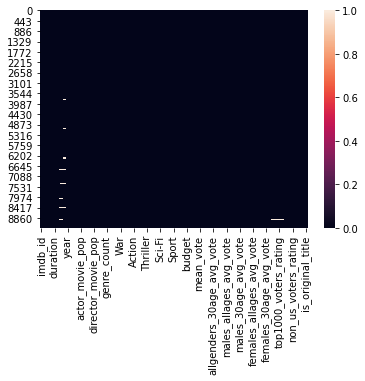

In [ ]:
sns.heatmap(final_df.isnull())

In [ ]:
final_df.drop(['top1000_voters_votes', 'top1000_voters_rating'], axis=1, inplace=True)

In [ ]:
final_df['females_45age_votes'].fillna(value=final_df['females_allages_votes'], inplace=True)
final_df['females_18age_votes'].fillna(value=final_df['females_allages_votes'], inplace=True)
final_df['females_30age_votes'].fillna(value=final_df['females_allages_votes'], inplace=True)
final_df['females_45age_avg_vote'].fillna(value=final_df['females_allages_avg_vote'], inplace=True)
final_df['females_18age_avg_vote'].fillna(value=final_df['females_allages_avg_vote'], inplace=True)
final_df['females_30age_avg_vote'].fillna(value=final_df['females_allages_avg_vote'], inplace=True)
final_df['males_18age_avg_vote'].fillna(value=final_df['males_allages_avg_vote'], inplace=True)
final_df['males_45age_avg_vote'].fillna(value=final_df['males_allages_avg_vote'], inplace=True)
final_df['males_18age_votes'].fillna(value=final_df['males_allages_votes'], inplace=True)
final_df['males_45age_votes'].fillna(value=final_df['males_allages_votes'], inplace=True)
final_df['allgenders_18age_avg_vote'].fillna(value=(final_df['males_18age_avg_vote']+final_df['females_18age_avg_vote'])/2, inplace=True)
final_df['allgenders_18age_votes'].fillna(value=(final_df['males_18age_votes']+final_df['females_18age_votes'])/2, inplace=True)

In [ ]:
final_df.drop('overview', axis=1, inplace=True)
final_df = final_df.fillna(0)

### Create Users or Critics feature

In [ ]:
final_df['us_voters_votes'].fillna(value=final_df['total_votes']-final_df['non_us_voters_votes'], inplace=True)
final_df['us_voters_rating'].fillna(value=final_df['mean_vote'], inplace=True)

In [ ]:
final_df['reviews_from_critics'].fillna(value=0, inplace=True)
final_df['reviews_from_users'].fillna(value=0, inplace=True)

In [ ]:
conditions = [(final_df['reviews_from_users'] == final_df['reviews_from_critics']), 
              (final_df['reviews_from_users'] > final_df['reviews_from_critics']), 
              (final_df['reviews_from_users'] < final_df['reviews_from_critics'])]
choices = [0, 1, 2]
final_df['users_or_critics'] = np.select(conditions, choices, default=0)
final_df.drop(['reviews_from_users', 'reviews_from_critics'], axis=1, inplace=True)

## Genre point

In [ ]:
final_df.columns.values

array(['imdb_id', 'title', 'original_title', 'date_published', 'duration',
       'revenue', 'year', 'popularity', 'actor_movie_count',
       'actor_movie_pop', 'actress_movie_count', 'actress_movie_pop',
       'director_movie_count', 'director_movie_pop', 'crew_count',
       'crew_pop', 'genre_list', 'genre_count', 'Comedy', 'Crime',
       'Drama', 'War', 'Horror', 'Adventure', 'Animation', 'Action',
       'Biography', 'Western', 'Family', 'Thriller', 'Mystery', 'Musical',
       'Fantasy', 'Sci-Fi', 'Romance', 'Documentary', 'History', 'Sport',
       'Music', 'Month', 'Day', 'budget', 'profit', 'ROI', 'total_votes',
       'mean_vote', 'median_vote', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_vo

In [ ]:
genre_df = final_df[['imdb_id','genre_list']]
genre_df = pd.DataFrame(genre_df['genre_list'].str.split(',').tolist(), index=genre_df['imdb_id']).stack()
genre_df = genre_df.reset_index([0, 'imdb_id'])
genre_df.columns = ['imdb_id', 'genre']
merge_df = final_df.drop(['title','original_title','Day','year',
                          'date_published', 'genre_list', 
                          'Drama', 'Adventure', 'Comedy','Crime', 'Western', 
                          'Biography', 'Action', 'Animation', 'Horror','Family', 'Mystery', 
                          'Musical', 'Sci-Fi', 'Fantasy', 'Romance','Thriller', 'Music', 'War', 
                          'Documentary', 'Sport', 'History','users_or_critics'], axis=1)
genre_df = pd.merge(genre_df, merge_df, on='imdb_id')

In [ ]:
genre_df['point'] = genre_df['popularity']/genre_df['genre_count']

In [ ]:
genre_month = genre_df[['genre','Month']].groupby('genre')['Month'].apply(list).to_frame()
genre_month.reset_index(inplace=True)
# genre_month
for i, row in genre_month.iterrows():
    count = [0] * 12
    for u in row.values[1]:
        count[u-1] += 1
    genre_month['Month'][i]= count
print(sum(genre_month['Month'].values[0]))
genre_month['Total'] = [sum(a) for a in genre_month['Month']]
genre_month

2758


,genre,Month,Total
0,Action,"[167, 399, 157, 180, 147, 146, 426, 226, 187, ...",2758
1,Adventure,"[71, 107, 113, 129, 84, 95, 681, 144, 75, 395,...",2161
2,Animation,"[16, 32, 37, 24, 16, 23, 312, 293, 16, 50, 20,...",900
3,Biography,"[78, 59, 567, 40, 33, 34, 22, 29, 53, 49, 57, 30]",1051
4,Comedy,"[242, 300, 559, 300, 502, 251, 262, 337, 314, ...",4182
5,Crime,"[416, 126, 410, 176, 134, 116, 86, 154, 189, 1...",2209
6,Documentary,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",1
7,Drama,"[746, 690, 726, 473, 607, 613, 539, 627, 548, ...",6861
8,Family,"[18, 44, 35, 29, 32, 28, 61, 60, 16, 66, 34, 81]",504
9,Fantasy,"[45, 51, 56, 47, 49, 48, 51, 63, 47, 72, 51, 85]",665


In [ ]:
# genre_point = genre_df[['genre','point','duration','budget','revenue','profit','ROI']].groupby('genre', as_index=False).mean()
genre_point = genre_df.drop(['Month','popularity','genre_count'],axis=1).groupby('genre', as_index=False).mean()
genre_act_count = genre_df[['genre']].groupby('genre', as_index=False).sum()

In [ ]:
genre_point_df= pd.merge(genre_point_df, genre_point, on='genre')
genre_point_df= pd.merge(genre_point_df, genre_act_count, on='genre')
genre_point_df= pd.merge(genre_point_df, genre_month, on='genre')

In [ ]:
genre_point_df

,genre,duration,revenue,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop,budget,profit,ROI,total_votes,mean_vote,median_vote,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,overview_count,ROI_group,is_original_title,point,Month,Total
0,Comedy,100.483262,5.031181e+07,2.991153,7.240522,1.948828,6.145824,1.248207,6.235306,6.188187,3.446169,7.559155e+10,-7.554124e+10,1599.111546,47812.563845,6.363941,6.339550,6.291200,10791.381396,6.127068,20514.298422,6.068580,5545.797704,6.113199,30139.401004,6.236418,7688.922525,6.086035,16530.125777,6.022956,4554.087996,6.317886,8061.308704,6.385246,2956.572692,6.250167,3754.220708,6.300263,907.585844,6.180727,9441.342659,6.098302,22264.621712,54.212339,0.630320,0.999044,2.796017,"[242, 300, 559, 300, 502, 251, 262, 337, 314, ...",4182
1,Crime,103.957447,3.329642e+07,3.413762,7.609137,1.803078,6.169182,1.178361,6.660027,6.395201,3.560021,1.877850e+10,-1.874520e+10,59716.007535,61379.128112,6.585378,6.673608,6.606225,11966.874378,6.442689,27835.134450,6.362155,7679.742870,6.462789,42130.603440,6.611634,9748.723404,6.433273,23965.962426,6.342236,6522.173834,6.500272,7029.520598,6.555908,2063.870530,6.444092,3558.967406,6.497782,1041.976007,6.481258,11171.316885,6.415392,29956.410140,46.763241,0.472612,1.000000,2.615611,"[416, 126, 410, 176, 134, 116, 86, 154, 189, 1...",2209
2,Drama,107.632852,2.695945e+07,3.188748,7.807560,2.000146,6.334236,1.461303,6.261505,6.650197,3.344404,1.542856e+10,-1.540160e+10,69728.440524,43514.688821,6.713380,6.841131,6.722839,9669.355779,6.510509,18453.072438,6.457922,5252.672497,6.514590,27849.664626,6.689623,7137.494389,6.477409,15014.351115,6.413453,4312.868970,6.659350,6867.673808,6.736656,2398.352135,6.595598,3217.284507,6.648841,858.719429,6.532357,7451.705874,6.506909,20785.907156,57.293397,0.366127,0.998980,2.568326,"[746, 690, 726, 473, 607, 613, 539, 627, 548, ...",6861
3,War,121.468900,2.628175e+07,3.052632,6.312450,1.019139,3.720721,1.157895,5.984695,5.229665,3.074565,1.630913e+11,-1.630650e+11,710174.487389,54033.521531,6.961722,7.033493,6.922010,11299.961722,6.744498,22299.071770,6.774163,7230.009569,6.769856,36403.081340,6.880861,9159.674641,6.716746,19192.177033,6.739713,6185.808612,6.958373,6122.502392,6.984689,1988.894737,6.882775,2847.454545,7.035885,938.425837,6.775120,9245.497608,6.746890,25447.449761,54.952153,0.363636,0.995215,2.341536,"[13, 18, 24, 29, 8, 9, 5, 18, 27, 23, 18, 17]",209
4,Horror,97.620942,3.199581e+07,2.446073,7.483895,1.615707,7.149032,1.121466,7.874070,5.183246,4.376747,2.773831e+10,-2.770631e+10,406037.053449,50426.408377,5.915393,5.945026,5.796126,10585.375916,5.707853,22711.655497,5.714031,5929.182199,5.715288,33497.200000,5.776859,8021.173822,5.692565,18969.830366,5.680314,5006.104712,5.824293,7128.951832,5.826387,2422.171728,5.776859,3484.766492,5.921466,831.823037,5.823874,9791.608377,5.654031,23922.907853,51.298429,0.536126,1.000000,3.429580,"[85, 75, 75, 84, 82, 70, 58, 87, 100, 117, 84,...",955
5,Adventure,101.977788,1.209182e+08,3.982416,8.396319,1.711245,6.743722,1.795928,8.844222,7.489588,3.874349,1.590027e+09,-1.469109e+09,169.477860,84635.487737,6.315317,6.293151,6.221703,21685.469227,6.001944,32896.552059,5.931652,8267.437298,6.065248,54469.026377,6.156270,16684.201758,5.963720,27497.121240,5.870430,6944.132346,6.347478,11681.896344,6.410227,4685.486812,6.227256,4996.336881,6.242804,1193.303563,6.133734,14173.950486,6.041925,3767

In [ ]:
genre_point_df.to_csv('/content/drive/My Drive/Colab Notebooks/genre_point.csv',index=False)

In [ ]:
final_df.to_csv('/content/drive/My Drive/Colab Notebooks/movies.csv',index=False)